# Histogramas 

Pequeña guía para realizar histogramas en R. 

**NOTA**. No se pudo correr el `ggplotly`T__T



In [2]:
# Histograma
library(readr)
library(dplyr)
library(ggplot2)
library(plotly)
library(tibble)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
20,176,77,195,nonsmo,b,alive
53,167,56,250,sigare,o,dead
44,170,80,304,sigare,a,dead
37,173,89,178,nonsmo,o,alive
26,170,71,206,sigare,o,alive
41,165,62,284,sigare,o,alive


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


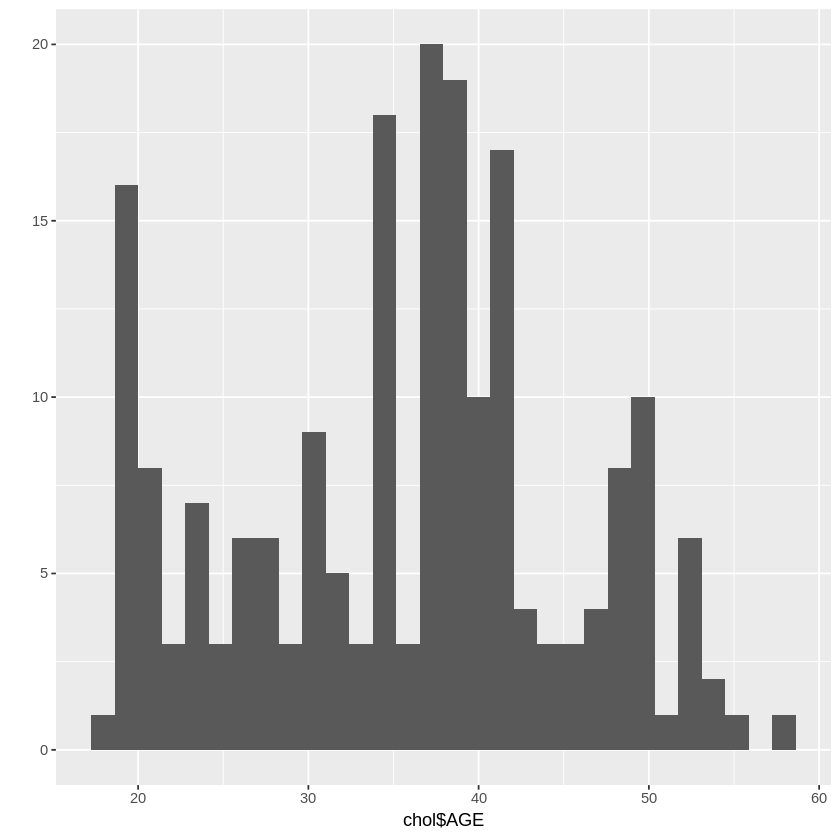

In [3]:

# CARGAMOS LA BASE DE DATOS
chol <- as_tibble(read.table(url("http://assets.datacamp.com/blog_assets/chol.txt"), header = TRUE))
head(chol)

#############
# D A T O S #
#############
# Los datos que se van a utilizar serán del tipo <int> (numeric). Se analizará la frecuencia.


######################
# qplot (Quick Plot) #
#####################
qplot(chol$AGE)



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


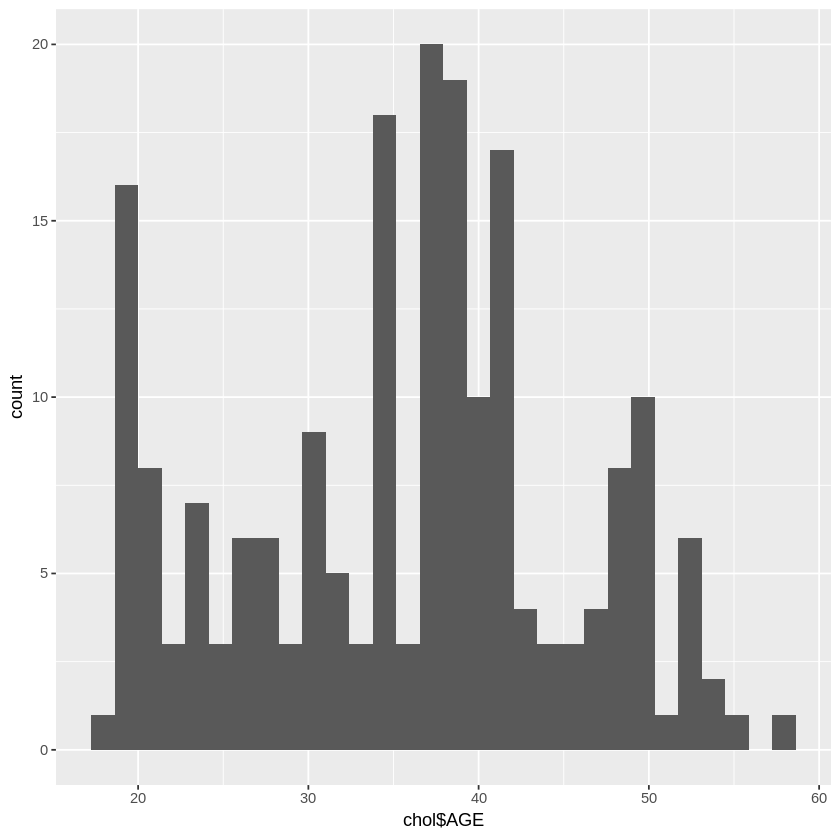

In [4]:
######################################
# ggplot basico (ignoramos los bins) #
######################################

# No nos metemos con los bins 
ggplot(data=chol, aes(chol$AGE)) + geom_histogram()

  # aes(le metemos datos numéricos), una vez que ya sabe que va a ser un objeto ggplot
  # le decimos que va a ser un histograma. 



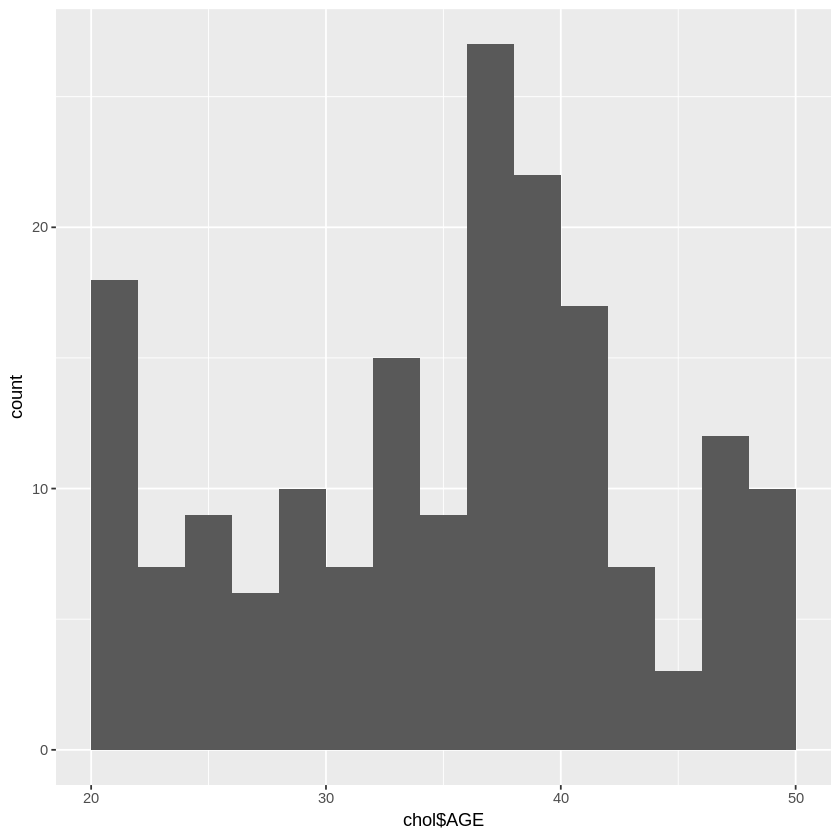

In [5]:
#########################################
# ggplot basico (considerando los bins) #
#########################################

# Nos metemos con los bins. Los bins son "cajones" o "botes" en los cuales "metemos" los datos. 
ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(breaks=seq(20, 50, by=2))
# Se pasan los breaks mediante la función `seq`
# Primer parámetro: inicio de la grafica
# Segundo parámetro: final de la gráfica
# Tercer parámetro (by = ), cortes. Cada gráfica almacena la 
#     frecuencia de observaciones en saltos de 2 en magnitud.



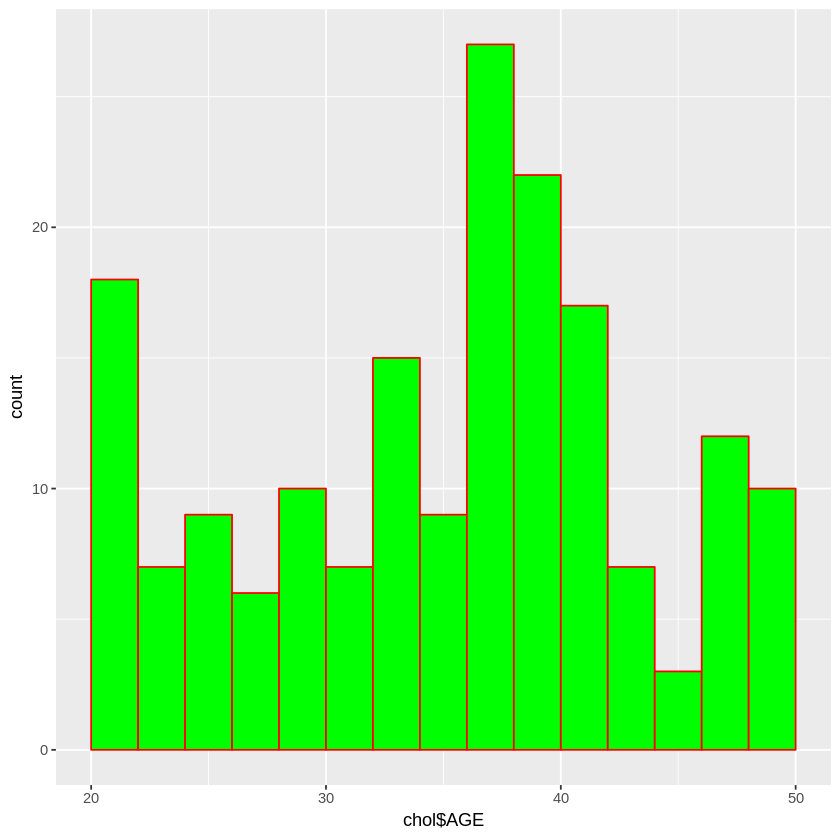

In [6]:
#########################################################################
# ggplot basico (considerando los bins) + colores de relleno y contorno #
#########################################################################
ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(breaks=seq(20, 50, by =2), 
                 col="red", 
                 fill="green")



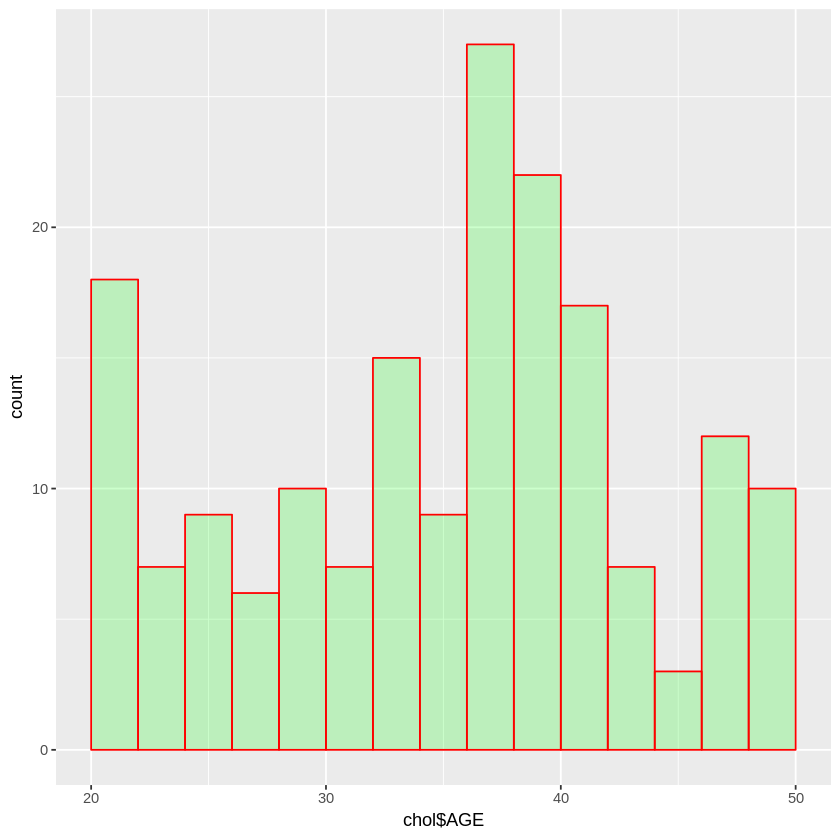

In [7]:
#########################################################################################
# ggplot basico (considerando los bins) + colores de relleno y contorno + transparencia #
#########################################################################################
ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(breaks=seq(20, 50, by =2), 
                 col="red", 
                 fill="green", 
                 alpha = .2)



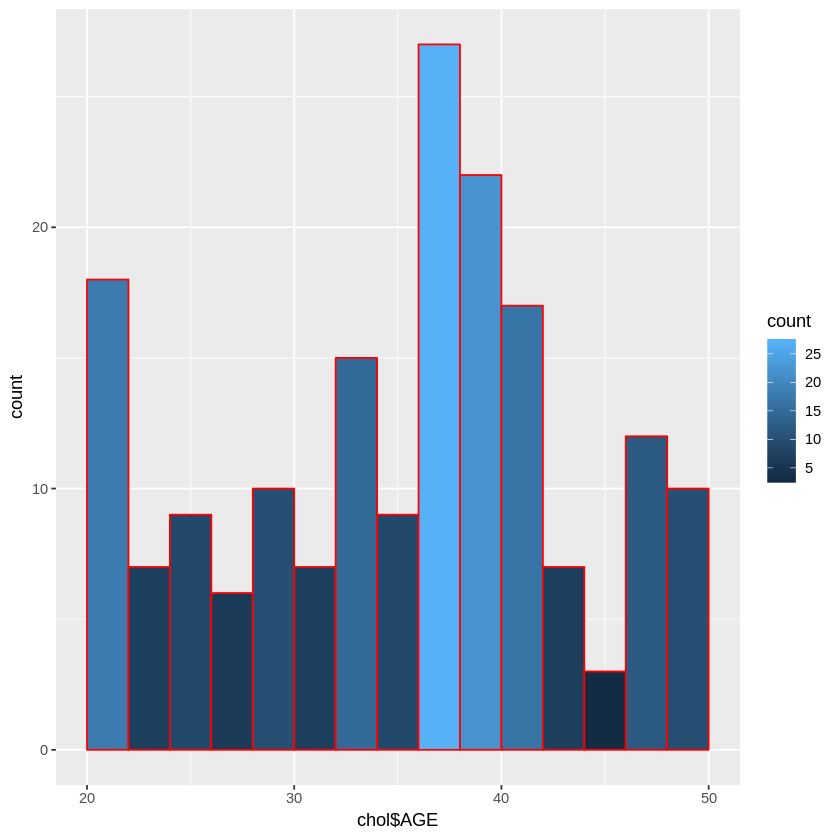

In [8]:
#########################################################################################
# ggplot basico (considerando los bins) + colores de contorno + transparencia           #
# + colores variables en las barras(COlor default azul)                                 #
#########################################################################################
ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(breaks=seq(20, 50, by =2), 
                 col="red", 
                 aes(fill=..count..))



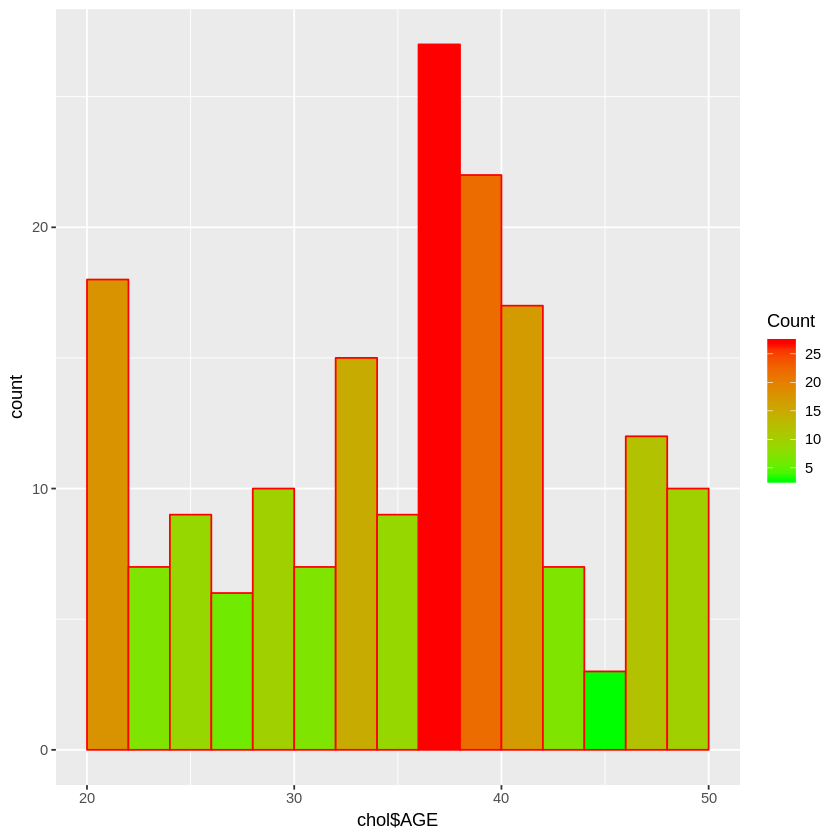

In [9]:
#########################################################################################
# ggplot basico (considerando los bins) + colores de contorno + transparencia           #
# + colores variables en las barras(colorfill gradient)                                 #
#########################################################################################

# En el anterior teniamos el color defalt azul. Ahora haremos una coloración en función de 
# la magnitud y, donde el gradiente será de verde (menos) a rojo (mas)
ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(breaks=seq(20, 50, by =2), 
                 col="red", 
                 aes(fill=..count..)) +
  scale_fill_gradient("Count", low = "green", high = "red")



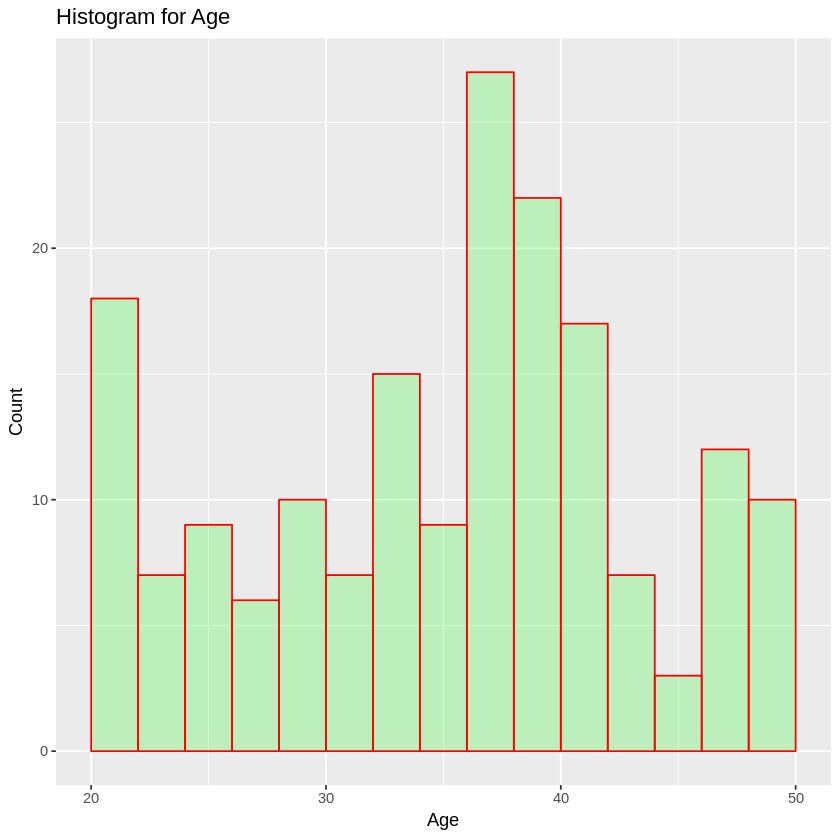

In [10]:


#########################################################################################
# ggplot basico (considerando los bins) + colores de contorno + transparencia           #
# + etiquetas de titulo                                                                 #
#########################################################################################
ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(breaks=seq(20, 50, by = 2), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for Age") +
  labs(x="Age", y="Count")



Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”

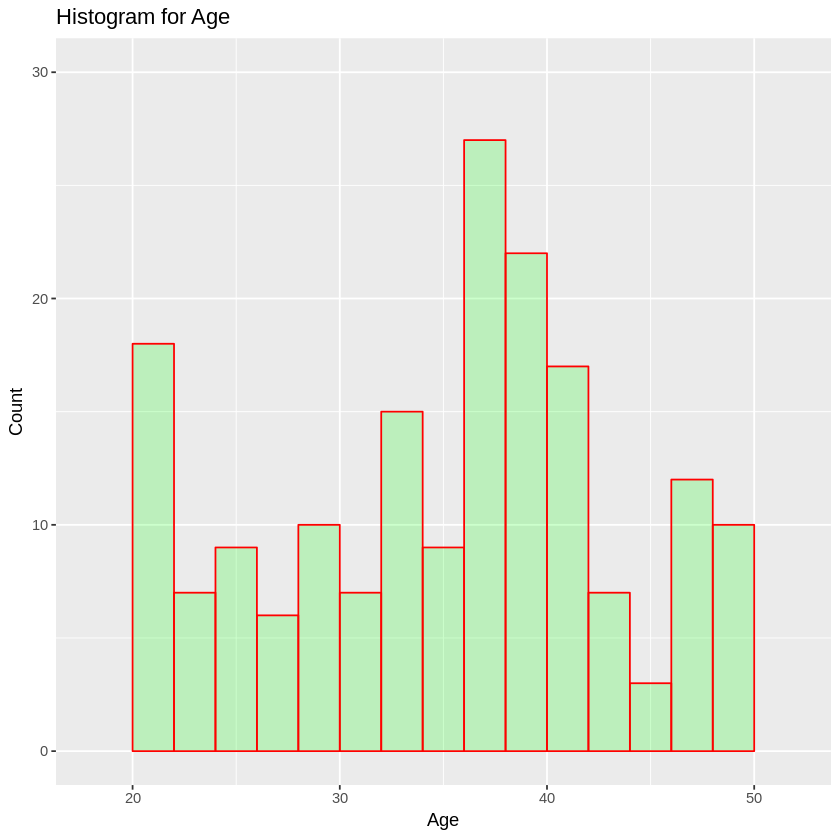

In [11]:
#########################################################################################
# ggplot basico (considerando los bins) + colores de contorno + transparencia           #
# + etiquetas de titulo + modificación de las escalas x-y                               #
#########################################################################################
ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(breaks=seq(20, 50, by = 2), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for Age") +
  labs(x="Age", y="Count") + 
  xlim(c(18,52)) +
  ylim(c(0,30))

# xlim limita el rango del eje x, 
# ylim limita el rango del eje y 



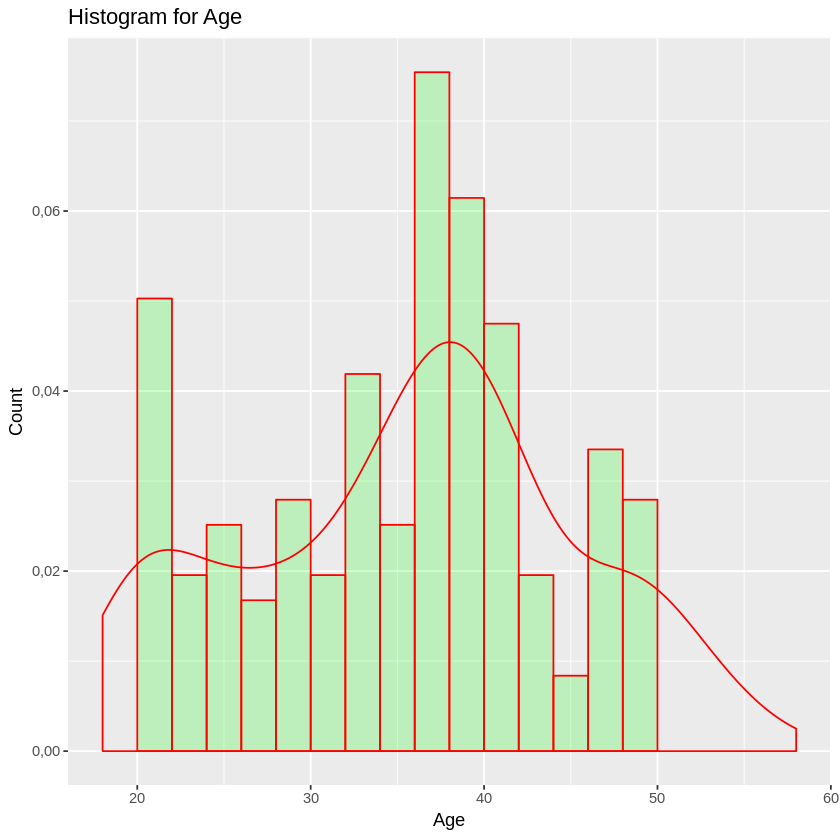

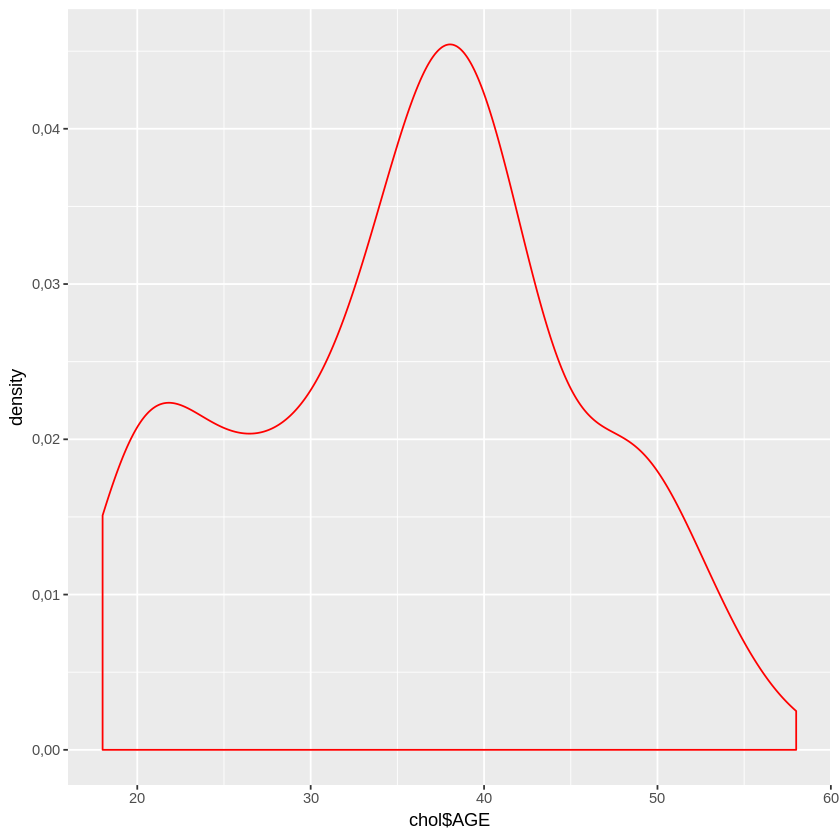

In [12]:
#########################################################################################
# ggplot basico (considerando los bins) + colores de contorno + transparencia           #
# + etiquetas de titulo + modificación de las escalas x-y                               #
#########################################################################################
ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(aes(y =..density..), 
                 breaks=seq(20, 50, by = 2), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  geom_density(col=2) +                # Se añade la linea de tendencia 
  labs(title="Histogram for Age") +
  labs(x="Age", y="Count")

# Aqui esta la linea de tendencia por separado, la cual igual es un objeto ggplot
# al cual se le dice que va a ser una linea de densidad.
ggplot(data=chol, aes(chol$AGE)) +
  geom_density(col=2)



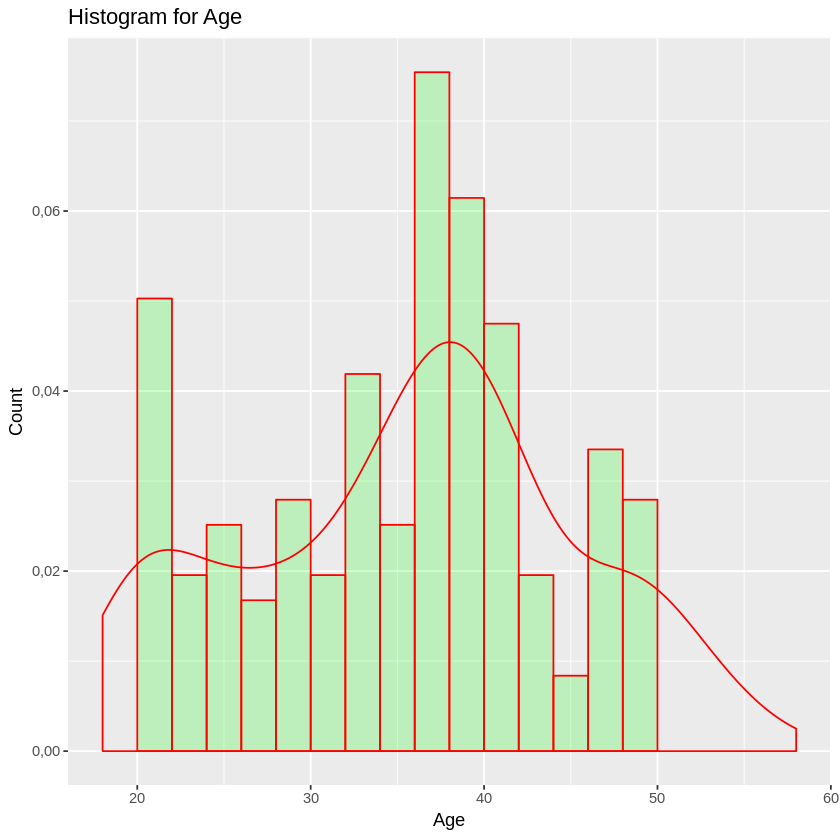

In [13]:
############
# ggplotly #
###########

# 1. Creamos el objeto ggplot
a <- ggplot(data=chol, aes(chol$AGE)) + 
  geom_histogram(aes(y = ..density..), 
                 breaks=seq(20, 50, by = 2), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  geom_density(col=2) +                # Se añade la linea de tendencia 
  labs(title="Histogram for Age") +
  labs(x="Age", y="Count")

a


Warning message:
“Calling `as_tibble()` on a vector is discouraged, because the behavior is likely to change in the future. Use `enframe(name = NULL)` instead.
This warning is displayed once per session.”

value
a
a
a
a
a
a
a
a
a
a


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

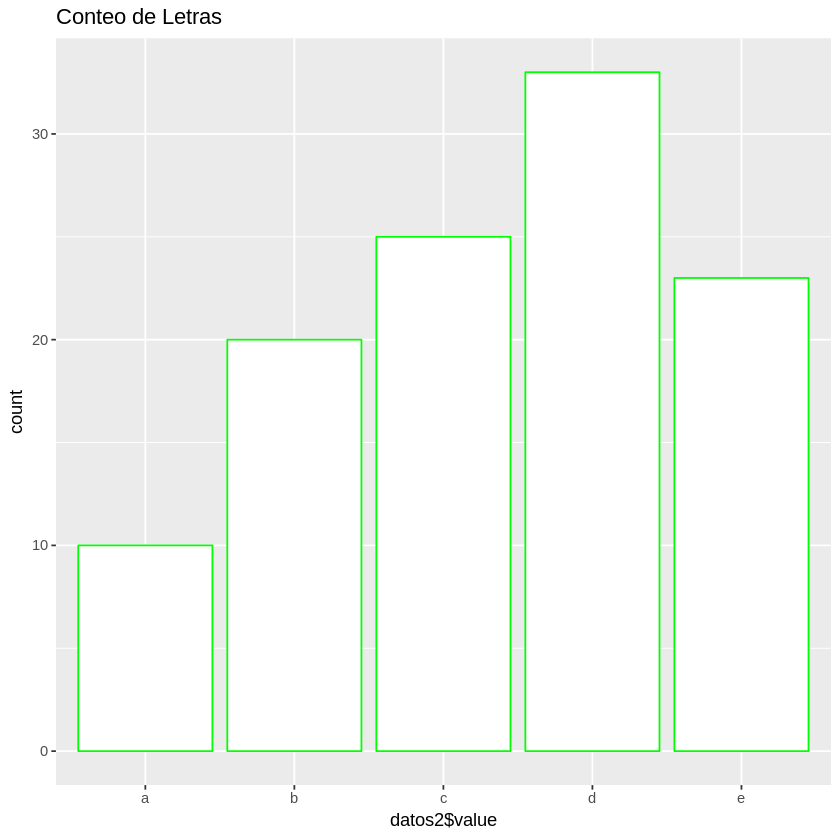

In [14]:

####################
# Datos characters #
####################
datos2 <- as_tibble( c(rep("a", 10), rep("b", 20), rep("c", 25), rep("d", 33), rep("e", 23)))
datos2

#############################################
# ggplot + colores bordo y relleno + titulo #
#############################################

ggplot(data = datos2, aes(datos2$value)) + 
  geom_histogram(stat="count", col = "green", 
                 fill = "white") + ggtitle("Conteo de Letras") 



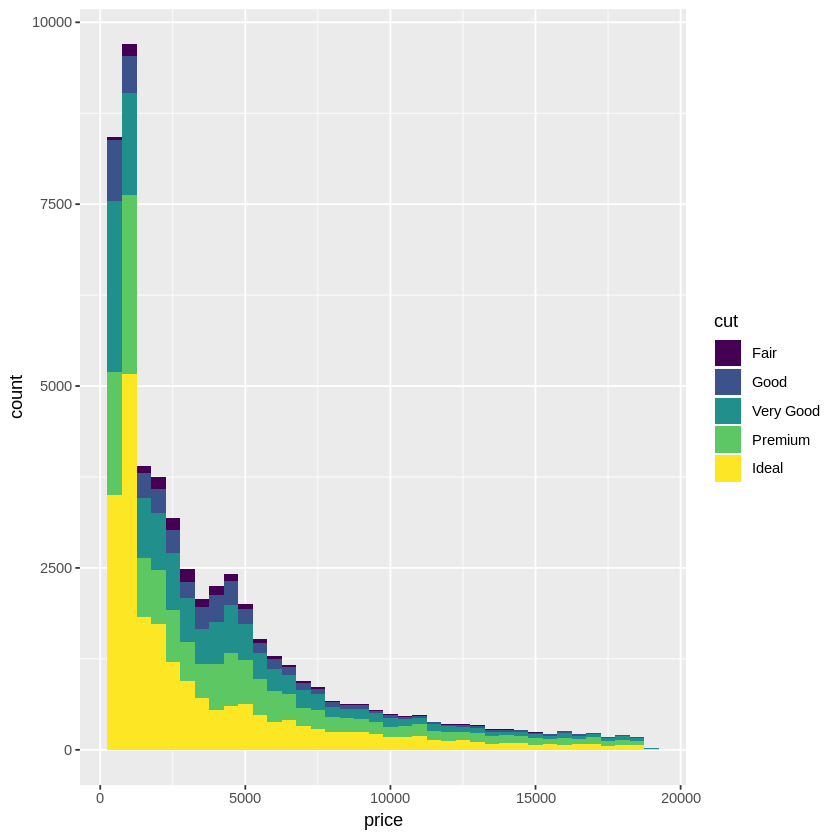

In [15]:

##########################################
# ggplot + multiples categorias a contar #
##########################################

# 1.- Diamonds.- Esta BD tiene informacion de caracteristicas de diamantes 

ggplot(diamonds, aes(price, fill = cut)) +
  geom_histogram(binwidth = 500)

# 2.- el introducir dos parametros en aes() nos dice que hay que considerar dos 
# cosas a la hora de colorear las barras. El tamaño de la barra lo da la frecuencia de ocurrencia, 
# el tamaño de cada color de la barra lo da la frecuencia de dicha caracteristica. 

